# LR-Zerlegung und vorwärts- rückwärtseinsetzen

Die Lösung eines LGS 

$$
    A \cdot \vec{x} = \vec{b}
$$
mit einer regulären $n \times n $ Koeffizientenmatrix $A$ soll wie im Skript beschrieben mit einer LR-Zerlegung gelöst werden. Sie können zuerst ohne Pivotstrategie beginnen, und diese nachher einbauen

In [67]:
import numpy as np

## Aufgabe 1: 
a) implementieren Sie die LR-Zerlegung gemäss Alg. 1, noch ohne Pivotstrategie

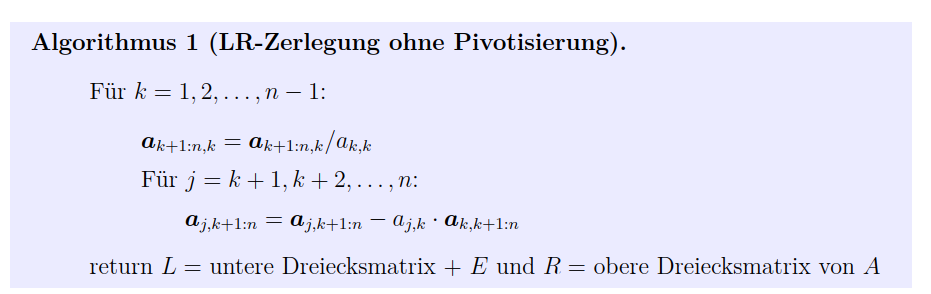

In [68]:
"""
Algorithmus 1 (LR-Zerlegung ohne Pivotisierung).
Für k = 1, 2, . . . , n − 1:
ak+1:n,k = ak+1:n,k/ak,k
Für j = k + 1, k + 2, . . . , n:
aj,k+1:n = aj,k+1:n − aj,k · ak,k+1:n
return L = untere Dreiecksmatrix + E und R = obere Dreiecksmatrix von A
"""

#für prufung: :n beduetet bis zum ende der zeile, :n in spalten bedeutet bis zum ende der spalte

def LR(A_in):
    A = A_in.copy() # A wird von LR überschrieben
    n = A.shape[0]  # Anzahl Zeilen von A. 
    assert(A.shape[0] == A.shape[1])  # check, ob A quadratisch ist.
    for k in range(n-1): #ZEILENLOOP minus eins weil beginnt mit 0 , aber matrix ja mit 1...
        A[k+1:n,k] = A[k+1:n,k] / A[k,k]
        for j in range(k+1,n): #SPALTENLOOP minus eins weil beginnt mit 0 , aber matrix ja mit 1...
            A[j,k+1:n] = A[j,k+1:n] - (A[j,k] * A[k,(k+1):n])
    L = np.tril(A,-1) + np.eye(n)
    R = np.triu(A)
    return L, R

b) Testen und ggf. korrigieren Sie den obigen Algorithmus. Sie können eines der Beispiele aus dem Unterricht für step-by-step debugging verwenden.

In [69]:
n = 7
A = np.random.rand(n, n)
L, R = LR(A)
print(np.linalg.norm(L@R-A)) # das sollte "=0" sein. alternative: assert(np.linalg.norm(L@R-A) < 1e-12)

4.697098170058938e-15


## Aufgabe 2: 
a) Implementieren Sie vorwärts- rückwärtseinsetzen gemäss Algorithmus 2. Für spätere Zwecke: verlassen Sie sich nicht darauf, dass $\ell_{i,i}$ immer gleich eins ist!

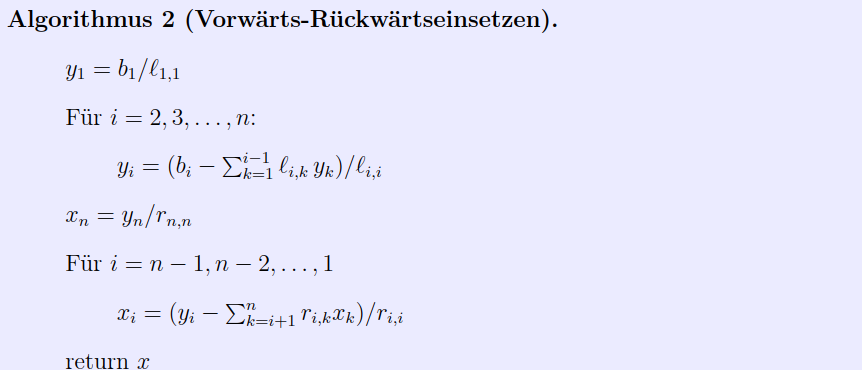

In [70]:
def fbsub(L, R, b):
    n = b.shape[0]
    # vorwärtseinsetzen
    y = np.zeros_like(b)
    y[0] = b[0] / L[0,0]
    for i in range (1, n):
        k = 0
        y[i] = (b[i] - np.sum(L[i, k:i] * y[k:i])) / L[i,i]
    assert( np.linalg.norm(L@y - b) < 1e-10 )  # Test, dass Vorwärtseinsetzen richtig funktioniert


    # rückwärtseinsetzen
    x = np.zeros_like(b)
    x[-1] = y[-1] / R[-1, -1]


    for i in range(n-2, -1, -1):
        k = i
        #x[i] = (y[i] - np.sum(R[-1, k:i] * x[k:i])) / R[i,i]
        x[i] = (y[i] - np.sum(R[i, i+1:] * x[i+1:])) / R[i,i]
    assert( np.linalg.norm(R@x - y) < 1e-10) # Test, dass Rückwärtseinsetzen richtig funktioniert
    
    return x
    
    

b) Damit können wir LGS lösen. Testen Sie dies und korrigieren Sie ggf

In [71]:
n = 7
A = np.random.rand(n, n)
b = np.random.rand(n)

L, R = LR(A)

x = fbsub(L, R, b)

print( np.linalg.norm(A@x - b) ) # das sollte "=0" sein.

1.5194751782544586e-15


c) Setzen Sie die beiden implementierten Algorithmen zu einem Algorithmus linsolve(A, b) zusammen

In [72]:
def linsolve(A, b):
    L, R = LR(A)
    return fbsub(L, R, b)

## Aufgabe 3: 
Erweitern Sie den Algorithmus der LR-Zerlegung um die Pivotstrategie relatives Spaltenmaximum (Alg. 3)

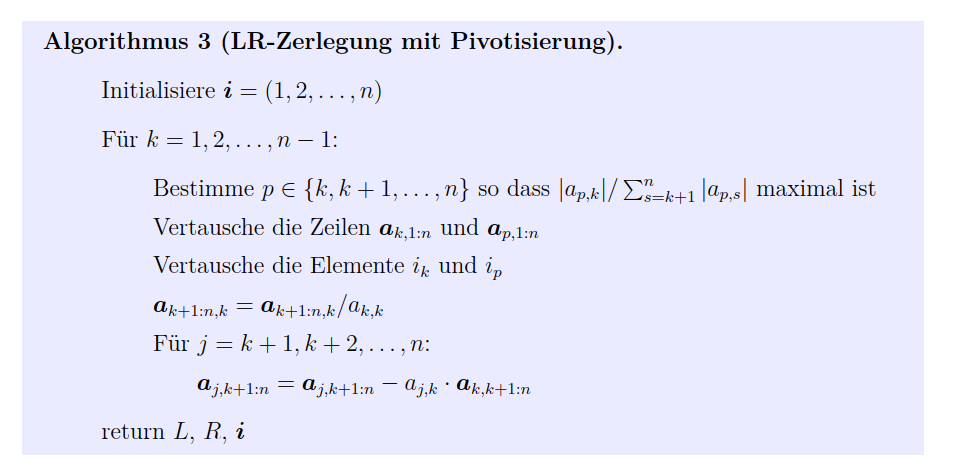

In [73]:
# Pivotstrategie relatives Spaltenmaximum

# bestimmt die Pivotzeile in der k x k - Submatrix "rechts unten" von A 
# und tauscht die Zeilen von A sowie die Einträge des Indexvektors I

#I ist die matrix die mitgetauscht werden muss (vertauschmatrix)
def pivot(A, I, k): 
    p = np.argmax(np.abs(A[k:, k])) + k     #privotelementzeilenindex: argmax : grösster wert in spalte k
    #Zeilentausch,: matrix a zeile k und Zeile p
    A[[k, p], :] = A[[p, k], :]
    #auch im indexvektor, k und p tauschen 
    I[[k, p]] = I[[p, k]]

In [74]:
def LR(A_in):
    A = A_in.copy() # A wird von LR überschrieben
    n = A.shape[0]  # Anzahl Zeilen von A. 
    I = np.arange(n) # Indexvektor
    assert(A.shape[0] == A.shape[1])  # check, ob A quadratisch ist.
    for k in range(n-1):
        # pivot finden und tauschen, siehe oben
        pivot(A, I, k) # einzige Änderung im Vergleich zu A1, falls "pivot" den Tausch direkt vornimmt
        #ak+1:n,k = ak+1:n,k/ak,k
        A[k+1:n,k] = A[k+1:n,k] / A[k,k]
        for j in range(k+1,n):
            # aj,k+1:n = aj,k+1:n − aj,k · ak,k+1:n
            A[j,k+1:n] = A[j,k+1:n] - (A[j,k] * A[k,(k+1):n])
    L = np.tril(A,-1) + np.eye(n)
    R = np.triu(A)
    return L, R, I

b) Testen und ggf. korrigieren Sie den Algorithmus. 

In [75]:
n = 7
A = np.random.rand(n, n)
L, R, I = LR(A)
print(np.linalg.norm(L@R-A[I])) # das sollte "=0" sein.

2.105814259841454e-16


Das Vorwärts- Rückwärtseinsetzen braucht nicht angepasst zu werden, aber in linsolve muss der Indexvektor berücksichtigt werden

In [76]:
def linsolve(A, b):
    L, R, I = LR(A)
    return fbsub(L, R, b[I])

Test...

In [77]:
n = 7
A = np.random.rand(n, n)
b = np.random.rand(n)

x = linsolve(A, b)

print( np.linalg.norm( A@x - b ) ) # das sollte "=0" sein.

7.021666937153402e-16
